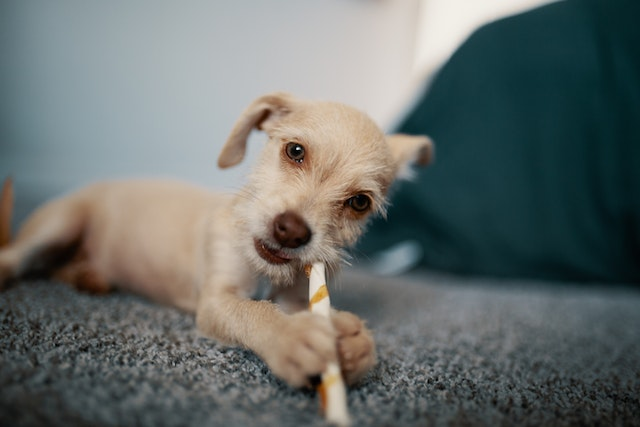

In [59]:
#!pip3 install pillow
import pandas as pd
import time
from calendar import timegm
#from time import strftime
import datetime
from rapidfuzz import fuzz, process
from PIL import Image
import csv
import os
DATA_FOLDER = 'data' # folder where the csv files are stored, relative to the current folder
petFile = ['data\Dutton.csv', 'data\Max.csv', 'data\Oliver.csv']
puppy_profile_file = 'data\PuppyProfiles.csv'
DOB = ''

#Read csv file
def load_file(fileIndex):

    csv_file=petFile[fileIndex]
    df = pd.read_csv(csv_file)

    return(df)

#Read csv file
def new_load_file(petProfileCSV=puppy_profile_file):

    df = pd.read_csv(petProfileCSV)

    return(df)

#Read CSV file from puppy profile
def new_read_file_from_CSV(): 

    readFile = pd.read_csv(new_load_file()["csvFile"].loc[int(whichfile())])

    return(readFile)

#Read csv file path location from puppy profile
def new_load_CSVFile_path_location():

    pupCSVPath = new_load_file()["csvFile"].loc[int(whichfile())]
    
    return(pupCSVPath)

def whichfile():
    usersearch = input("Which profile would you like to review?")
    return int(usersearch)

#Adds new row to file for new pet weight record
def add_new_weight_record(fileIndex):

    csv_file=petFile[fileIndex]

    input_date = input("Input Date: ")
    weight = input("Input weight: ")
    image = input("Select Image: ")
    comment = input("Input comment: ")
    # Define the user data as a list
    user_data = [input_date, weight, image, comment]

    try:
        # Open the CSV file in append mode
        with open(csv_file, mode='a', newline='') as csvfile:
            # Create a CSV writer
            writer = csv.writer(csvfile)
            
            # Write the user data to the CSV file
            writer.writerow(user_data)
            
        print("User data added successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")


#Adds a new pet to file.
def add_new_pet(file=puppy_profile_file):

    pet_ID = input("Input PetID:")
    pet_name = input("Input Pet's Name: ")
    DOB = input("Input pet's Date of Birth: ")
    breed = input("Input Breed: ")
    image = input("Input Image: " )
    csvFile = input("Input folder: ")
    # Define the user data as a list
    user_data = [pet_ID, pet_name, DOB, breed, image, csvFile]

    try:
        # Open the CSV file in append mode
        with open(file, mode='a', newline='') as csvfile:
            # Create a CSV writer
            writer = csv.writer(csvfile)
            
            # Write the user data to the CSV file
            writer.writerow(user_data)
            
        print("User data added successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")

#Returns every pet's record from petprofile csv
def Get_All_Profiles(petProfile=puppy_profile_file):
    
    df = pd.read_csv(petProfile)
    print(df) # formatted, with leading index row

#Prints out individual pet's entry records, e.g. an entry for a day
def print_indvidual_entry_record(fileIndex):

    csv_file=petFile[fileIndex]
    df = pd.read_csv(csv_file)
    userSearch = input("What record do you want to return?")
    r = df.loc[int(userSearch)]
    print(r, "\n")

    #Returns individual pet's weight records
def print_weight_record_for_individual(fileIndex):
    
    csv_file=petFile[fileIndex]
    df = pd.read_csv(csv_file)
    userSearch = input("What weight do you wan to return?")

    r = df["Weight"].loc[int(userSearch)]
    #weight = df["Weight"].loc[r]
    #print({weight})
    print(r)

#Calculates age
def getAge(fileIndex, pup=puppy_profile_file): #DOB = '01/05/2023', , date_of_entry = '05/02/2023'
    """Calculate the age based on all of the Date fields from the PetRecord.csv file and compares to the DOB field from the pets.csv file."""
    csv_file=petFile[fileIndex]
    df = pd.read_csv(pup)
    r = 1
    DOB = df["Date of Birth"].loc[r]
    print({DOB})

    df = pd.read_csv(csv_file)
    r = 1
    date_of_entry = df["DateofEntry"].loc[r]
    print({date_of_entry})   

    DOButc_time = time.strptime(DOB + ' 00:00:00', "%m/%d/%Y %H:%M:%S")
    DOBepoch_time = timegm(DOButc_time)

    DOEutc_time = time.strptime(date_of_entry + ' 00:00:00', "%m/%d/%Y %H:%M:%S")
    DOEepoch_time = timegm(DOEutc_time)

    #Print the age
    #Print(f"The person is "  + str(epoch_time) + " years old.")
    #print("UTC " + str(DOButc_time))
    #print("DOBepoch_time " + str(DOBepoch_time))
    #print("Month " + str(DOButc_time.tm_mon))
    #print("Day " + str(DOButc_time.tm_mday))
    #print("Year " + str(DOButc_time.tm_year))

    #Calculate the age
    age = DOEepoch_time - DOBepoch_time #Subtract the DateOfEntry = DateOfBirth
    #print("Age " + str(age))
    print("Days: " + str(age/(3600 * 24))) # ((60 seconds * 60 minutes) = 3600 * 24 hours)
    print("Months: " + str(age/(60 * 60 * 24 * 30))) # (60 seconds * 60 minutes * 24 hours * 30 days)
    print("Years: " + str(age/(3600 * 24 * 365))) # ((60 seconds * 60 minutes) = 3600 seconds * 24 hours * 365 days)

#loads image for profile
def get_puppy_profile_image():
    new_load_file()
    r = input("What image do you want?")
    pupImage = new_load_file()["Profile Image"].loc[int(r)]
    # load and show images
    img = Image.open(pupImage)
    display(img) # in jupyter, the image is shown as output
    
    """df = pd.read_csv(pup)
    r = input("What image do you want?")
    pupImage = df["Profile Image"].loc[int(r)]
    # load and show images
    img = Image.open(pupImage)
    display(img) # in jupyter, the image is shown as output"""

 #loads image
def get_individual_image(fileIndex):

    csv_file=petFile[fileIndex]
    df = pd.read_csv(csv_file)
    r = input("What image do you want?")
    pupImage = df["Image"].loc[int(r)]
    # load and show images
    img = Image.open(pupImage)
    display(img) # in jupyter, the image is shown as output   

#Plots csv file into plotly
def plotcsv():
    '''Plots pet csv file based on PetID selected by user. '''
    
# Get Pet
def display_UI():
    '''Print values per the unique PetIDs to generate buttons.'''

# gets dog's profile based on PetID.
def get_uniquedogprofile(pup=puppy_profile_file):
    '''returns dog's profiles based on petID.'''
    df = pd.read_csv(pup)
    userSearch = input("What pet's profile do you want to see?")

    r = df["PetID"].loc[int(userSearch)]
    print(r, "\n")

# Add to pet array and add it to the list
def add_to_pet_array(pup=puppy_profile_file):
    user_input = input("Enter a value to add to the array: ")
    pup.append(user_input)

    # Print the updated array
    print("Updated array:", pup)

# Delete to pet array
def delete_to_pet_array(file=petFile):
    user_input = input("Enter a value to delete from the array: ")
    file.append(user_input)

    print(df.drop(3, axis=0, inplace=False))
    # Print the updated array
    print("Updated array:", file)    

#delete_to_pet_array()
#TheFile = whichfile()
#load_file(TheFile)
#add_to_pet_array()
#new_load_file()
#new_read_file_from_CSV()
#new_load_CSVFile_path_location()

#add_new_pet()
#new_read_file_from_CSV()
#add_new_weight_record(TheFile)
#add_new_pet()
#Get_All_Profiles()
#print_indvidual_entry_record(TheFile)
#print_weight_record_for_individual(TheFile)
#getAge(TheFile, puppy_profile_file)
get_puppy_profile_image()
#get_individual_image(TheFile)
#get_uniquedogprofile()



#printFile = load_file(TheFile)
#print(printFile)
#get_uniquedogprofile()

